In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv("")

df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [3]:
df2 = df.dropna()
df2.isnull().sum()


brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

In [4]:
df2
house_date = df2["prev_sold_date"]
house_year = []
house_month = []
house_day = []
for date in house_date:
    year, month, day = date.split("-")
    house_year.append(year)
    house_month.append(month)
    house_day.append(day)

df2["Year"] = house_year
df2

C:\Users\maxro\AppData\Local\Temp\ipykernel_80920\1638886641.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Year"] = house_year


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,Year
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,2019
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11,2013
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05,2018
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,2014
3410,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25,2022
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25,2022
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24,2022
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24,2022


In [17]:
import numpy as np
house_year_price = df2.groupby('Year')['price'].mean().reset_index()
house_year_price = np.array(house_year_price)
house_year = []
house_price = []

for item in house_year_price:
    house_year.append(int(item[0]))
    house_price.append(float(item[1]))

house_year = np.array(house_year)
house_price = np.array(house_price)


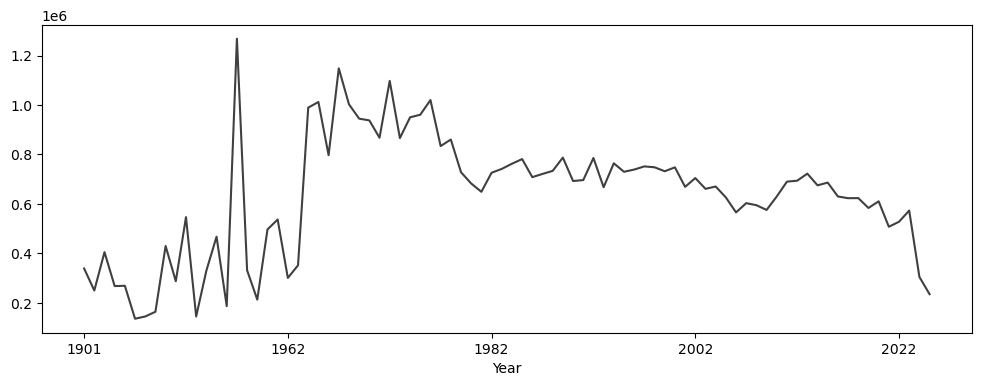

In [6]:
housees = df2.groupby('Year').price.mean()
housees.plot(figsize=(12,4), color='black', alpha=0.75)
plt.show()

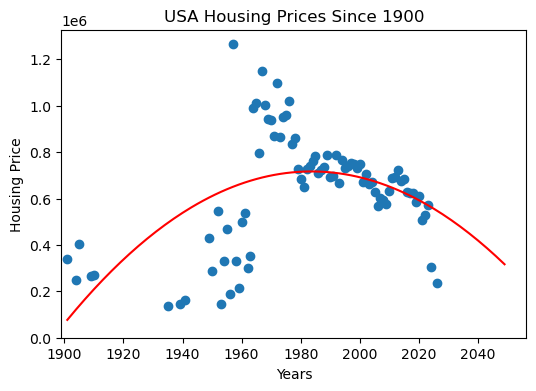

In [33]:
from scipy.optimize import curve_fit

def quad_find(x, a, b, c):
    return a*x**2 + b*x + c


years = range(house_year[0], 2050)

params, usel = curve_fit(quad_find, house_year, house_price)
a = params[0]
b = params[1]
c = params[2]

predicted_price = quad_find(np.array(years), a, b, c)

plt.figure(figsize = (6,4))
plt.scatter(house_year, house_price)
plt.plot(years, predicted_price, color = "Red")
plt.xlabel("Years")
plt.ylabel("Housing Price")
plt.title("USA Housing Prices Since 1900")
plt.xlim(1899)
plt.ylim(0)
plt.show()

In [5]:
mask1 = df2['status'] == "for_sale"
for_sale = df2[mask1]
for_sale

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,612.0,2520.0
...,...,...,...,...,...,...,...,...,...,...,...
1414352,21688.0,for_sale,590000.0,4.0,3.0,0.41,360476.0,Ketchikan,Alaska,99901.0,3603.0
1414353,21688.0,for_sale,699000.0,3.0,2.0,3.21,817200.0,Ketchikan,Alaska,99901.0,2844.0
1414354,21688.0,for_sale,699000.0,3.0,2.0,3.21,817199.0,Ketchikan,Alaska,99901.0,3000.0
1414358,21688.0,for_sale,590000.0,4.0,3.0,0.41,360473.0,Ketchikan,Alaska,99901.0,3603.0


In [10]:
Y_vals = df2['price']
X_vals = df2.drop(columns = ["brokered_by", "status", "price", "street", "city","zip_code", "state"])
X_vals = sm.add_constant(X_vals)

all_model = sm.OLS(Y_vals, X_vals)
all_results = all_model.fit()
print(all_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                 6.023e+04
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:54:54   Log-Likelihood:            -2.0780e+07
No. Observations:             1354105   AIC:                         4.156e+07
Df Residuals:                 1354100   BIC:                         4.156e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.678e+05   2488.941    -67.431      0.0

In [6]:
michigan = df2['state'] == "Michigan"
michigan_df = df2[michigan]

In [8]:
Y_values = michigan_df['price']
X_values = michigan_df.drop(columns = ["brokered_by", "status", "price", "street", "city","zip_code", "state"])
X_values = sm.add_constant(X_values)

In [9]:
mich_model = sm.OLS(Y_values, X_values)
mich_results = mich_model.fit()
print(mich_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     3578.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:52:54   Log-Likelihood:            -3.1335e+05
No. Observations:               22079   AIC:                         6.267e+05
Df Residuals:                   22074   BIC:                         6.268e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.311e+04   6047.603      2.168      0.0

In [43]:

mask2 = df2['city'] == "East Lansing"
michigan_df = df2[mask2]
michigan_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
747903,22343.0,for_sale,579900.0,4.0,4.0,0.34,1519702.0,East Lansing,Michigan,48823.0,4117.0
747908,53265.0,for_sale,349900.0,3.0,3.0,0.21,1440806.0,East Lansing,Michigan,48823.0,3082.0
747910,79102.0,for_sale,350000.0,4.0,4.0,0.14,465821.0,East Lansing,Michigan,48823.0,2824.0
748467,22342.0,for_sale,1998500.0,4.0,6.0,1.40,1512515.0,East Lansing,Michigan,48823.0,10993.0
748623,22342.0,for_sale,698900.0,5.0,5.0,0.46,1514558.0,East Lansing,Michigan,48823.0,5665.0
...,...,...,...,...,...,...,...,...,...,...,...
1790806,79179.0,sold,269900.0,3.0,3.0,0.13,1700580.0,East Lansing,Michigan,48823.0,1592.0
1790810,22341.0,sold,150000.0,3.0,2.0,0.24,432884.0,East Lansing,Michigan,48823.0,1514.0
1790828,10664.0,sold,219900.0,4.0,2.0,0.12,1319833.0,East Lansing,Michigan,48823.0,1708.0
1790836,22342.0,sold,165000.0,3.0,2.0,0.39,1049674.0,East Lansing,Michigan,48823.0,1956.0


In [44]:
Y_values = michigan_df['price']
X_values = michigan_df.drop(columns = ["brokered_by", "status", "price", "street", "city","zip_code", "state"])
X_values = sm.add_constant(X_values)

EL_model = sm.OLS(Y_values, X_values)
EL_results = EL_model.fit()
print(EL_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     285.4
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.75e-72
Time:                        22:07:56   Log-Likelihood:                -2173.2
No. Observations:                 168   AIC:                             4356.
Df Residuals:                     163   BIC:                             4372.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.027e+04   2.43e+04     -1.248      0.2

<AxesSubplot:>

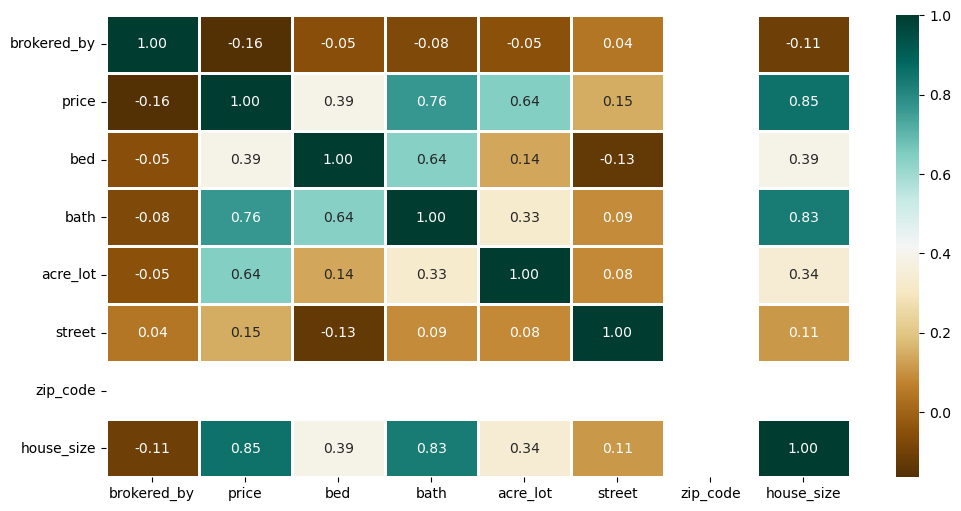

In [45]:
plt.figure(figsize=(12, 6))
sns.heatmap(michigan_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [46]:
from sklearn.linear_model import LogisticRegression

# Importing necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


EL_sale = michigan_df[michigan_df["status"] == "for_sale"]
EL_1000 = EL_sale[EL_sale["house_size"] <= 1000]
EL_2000 = EL_sale[EL_sale["house_size"] <= 2000]



EL_3000 = EL_sale.loc[(EL_sale["house_size"] > 2000) & (EL_sale["house_size"] <= 3000)]
EL_4000 = EL_sale.loc[(EL_sale["house_size"] > 3000) & (EL_sale["house_size"] <= 4000)]
EL_5000 = EL_sale.loc[(EL_sale["house_size"] > 4000) & (EL_sale["house_size"] <= 5000)]
EL_6000 = EL_sale[EL_sale["house_size"] > 5000]

EL_sale.loc[EL_2000.index, 'price'] = 0
EL_sale.loc[EL_3000.index, 'price'] = 1
EL_sale.loc[EL_4000.index, 'price'] = 2
EL_sale.loc[EL_5000.index, 'price'] = 3
EL_sale.loc[EL_6000.index, 'price'] = 4

features = EL_sale.drop(columns = ["price", "street","city","state", "brokered_by","status"])
labels = EL_sale['price']


train_vectors, test_vectors, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=0)



logit_model = LogisticRegression()
logit_model.fit(train_vectors, train_labels)
predictions = logit_model.predict(test_vectors)
print(classification_report(test_labels, predictions))
accuracy = accuracy_score(test_labels, predictions)
print(accuracy)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         3
         3.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

1.0


C:\Users\maxro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


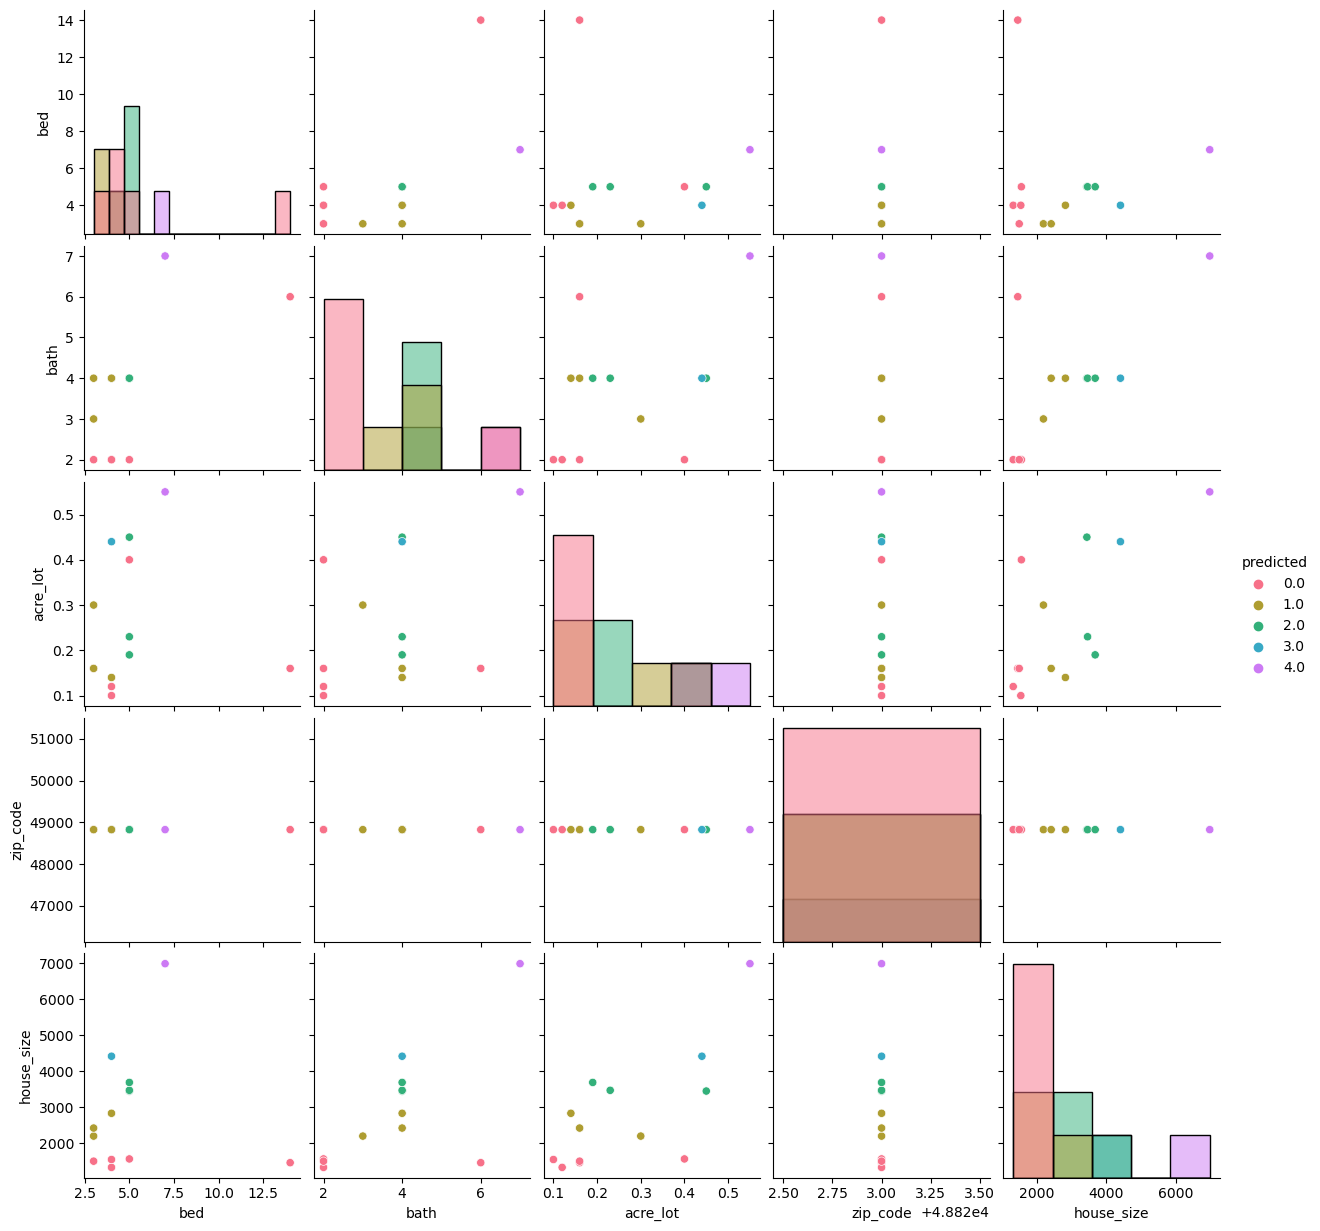

In [47]:
import numpy as np
test_vectors_with_predictions = test_vectors.copy()
test_vectors_with_predictions['predicted'] = predictions

custom_palette = sns.color_palette("husl", n_colors=len(np.unique(predictions)))  # Adjust n_colors as needed

# Create a pairplot with the predicted labels and custom color palette
sns.pairplot(test_vectors_with_predictions, hue='predicted', diag_kind='hist', palette=custom_palette)
plt.show()